# Sensitivity Acoustic Detector

In [1]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

## Papers
* 1. https://arxiv.org/pdf/astro-ph/0608312.pdf
* 2. https://ecap.nat.fau.de/wp-content/uploads/2017/04/habil_schrift.pdf
* 3. https://arxiv.org/pdf/astro-ph/0101216.pdf

## Formula's

Following the paper of Lahman the following formula (4.28) represents the number of detected events over time T:

$$N_d = 2\pi T \int dE  \Phi(E) \frac{V_{eff}(E)}{\lambda(E)}$$

**Parameters:**
* $N_{d}$ = number of detected events [$sr^-1$]
* $T$ = time over which the number of detected events is taken [$s$]
* $\Phi(E)$ = flux at the detector surface  [$GeV^{-1} cm^{-2} s^{-1} sr^{-1}$]
* $V_{eff}(E)$ = the effective volume of the detector [$cm^3$]
* $\lambda(E)$ = the mean free path [$cm$]

We also know that the spectral event rate and the flux at the detector flux are related to one another:

$$\frac{dN}{dtdE} = \Phi(E) * \frac{V_{eff}(E)}{\lambda(E)}$$


**Parameters:**
* $\frac{dN}{dtdE}$ = spectral event rate [$GeV^{-1} yr^{-1}$]
* $\Phi(E)$ = flux at the detector surface [$GeV^{-1} cm^{-2} s^{-1} sr^{-1}$]
* $V_{eff}(E)$ = the effective volume of the detector [$cm^3$]
* $\lambda(E)$ = the mean free path [$cm$]

We also know that

$$ E^2 \Phi(E) = E^2 * \Phi(E)$$

* $E$ = energy [$GeV$]
* $\Phi(E)$ = flux at the detector surface [$GeV^{-1} cm^{-2} s^{-1} sr^{-1}$]
* $E^2 \Phi(E)$ = weighted flux or energy-squared flux [$GeV cm^{-2} s^{-1} sr^{-1}$]


## Parameters
#### 1. E = Energy [eV, GeV]

In [2]:
# Initialise lists for the energy
E_eV = [10**19, 10**20, 10**21, 10**22, 10**23, 10**24, 10**25]                # in eV
E_GeV = [i / 1e9 for i in E_eV]                                                # in GeV

print(E_GeV)

[10000000000.0, 100000000000.0, 1000000000000.0, 10000000000000.0, 99999999999999.98, 1000000000000000.0, 1e+16]


#### 2. $\lambda$ = Mean Free Path [cm]

In [3]:
# Initialise lists for the mean free path (section 3.3 in Lahmann)
# foenergies above the 10^14 GeV increasingly large mean free paths are taken since
# neutrinos from higher sections are less abundant and no values are given in the paper
lambda_Ed = [10**(-2.1), 10**(-2.4), 10**(-2.7), 10**(-1.4), 10**(-0.2), 10**(0.6), 10**(1.8)]     # in earth diameter for E = 10^19, 10^20, 10^21 
low_lambda_E = [10**(-0.1), 10**(-0.85), 10**(-1.1), 10**(-1.7), 10**(-1.9)]                       # for E = 10^14, 10^15, 10^16, 10^17, 10^18
lambda_E = [i * 1.2742 * 10**9 for i in lambda_Ed]                                                 # in cm

print(lambda_E)

[10121330.366856793, 5072681.567192663, 2542363.241733345, 50726815.67192663, 803965848.3366623, 5072681567.192662, 80396584833.66623]


#### 3. $V_{eff}$ = Effective Volume [$cm^3$]

In [4]:
# Initialise lists for the effective volume
Veff_km = [10**(-0.4), 10**(1.07), 10**(2.08), 10**(3.03), 10**(3.13), 10**(3.2), 10**(3.35)]  # in km3 optimum scenario
Veff = [i * 10**15 for i in Veff_km]                                                           # in cm3 optimum scenario

Veff_km_cuts = [10**(-0.8), 10**(0.7), 10**(1.4), 10**(2.08), 10**(2.18), 10**(2.13), 10**(2.05)]
Veff_cuts = [i * 10**15 for i in Veff_km_cuts] 

print(Veff)
print(Veff_cuts)

[398107170553497.2, 1.1748975549395296e+16, 1.2022644346174131e+17, 1.071519305237606e+18, 1.348962882591653e+18, 1.584893192461114e+18, 2.23872113856834e+18]
[158489319246111.34, 5011872336272722.0, 2.5118864315095796e+16, 1.2022644346174131e+17, 1.5135612484362086e+17, 1.3489628825916531e+17, 1.122018454301963e+17]


#### 4. $\frac{dN}{dtdE}$ = Spectral Event Rate [$GeV^{-1} yr^{-1}$]


In [5]:
# Initialise lists for the spectral event rate
spectral_event_rate = [10**(-11.7), 10**(-13.5), 10**(-15.2), 10**(-17), 10**(-18.9), 10**(-20.8), 10**(-22.9)]   # in yr^-1 GeV^-1

print(spectral_event_rate)

[1.9952623149688827e-12, 3.1622776601683796e-14, 6.309573444801943e-16, 1e-17, 1.2589254117941713e-19, 1.5848931924611108e-21, 1.2589254117941713e-23]


In [6]:
conversion_factor = (2 * np.pi) / (60*60*24*365)

# in the paper they assume a flux
ultimate_weighted_flux = 2.25 * 10**(-8)                                                       # in GeV s^−1 cm^−2 sr^−1

# calculate the normal flux from the weighted flux and change the units
ultimate_flux = [ultimate_weighted_flux * 1e10 / (i**2 * conversion_factor) for i in E_GeV]    # in GeV^-1 yr^−1 km^−2

#### 5. $\Phi(E)$ = Flux at the Detector Surface [$GeV^{-1} cm^{-3} yr^{-1}$]

In [7]:
# use one of the formula's to get the flux from the specral event rate and the effective volume
flux = [(i * j) / (k) for i, j, k in zip(spectral_event_rate, lambda_E, Veff)]                # in yr^-1 GeV^-1 cm^-2
flux_cuts = [(i * j) / (k) for i, j, k in zip(spectral_event_rate, lambda_E, Veff_cuts)]      # in yr^-1 GeV^-1 cm^-2
flux_ulti = [(i * j) / (k) for i, j, k in zip(ultimate_flux, lambda_E, Veff)]                 # in yr^-1 GeV^-1 cm^-2

print(flux)
print(flux_cuts)
print(flux_ulti)

[5.0726815671926697e-20, 1.3653298987337586e-23, 1.3342511959264575e-26, 4.734101889156176e-28, 7.503045856540942e-29, 5.072681567192651e-30, 4.521032205614233e-31]
[1.2742000000000017e-19, 3.200645691029509e-23, 6.386127730878712e-26, 4.2192727499311765e-27, 6.687096658502623e-28, 5.959881170281472e-29, 9.020645184622718e-30]
[2.87109033652563e-19, 4.875810939648906e-23, 2.388068925484993e-26, 5.346220383841442e-28, 6.730492698269959e-29, 3.614488584208782e-30, 4.05552289434603e-31]


#### 6. T = time over which the number of events is taken [s]


In [8]:
# we want to know the sensitivity after one year 
time = 60*60*24*365                                                             # one year in seconds

## Calculations

Following the paper of Lahman the following formula (4.28) represents the number of detected events over time T:

$$E^2 \Phi = \Phi(E) * E^2$$


$$[GeV cm^{-2} s^{-1} sr^{-1}] = [GeV^{-1} cm^{-3} yr^{-1}] * [GeV^2]$$
$$[GeV cm^{-2} s^{-1} sr^{-1}] = [GeV cm^{-3} yr^{-1}]$$
$$[GeV cm^{-2} s^{-1} sr^{-1}] = [GeV cm^{-3} (\frac{1}{31 556 926}s^{-1}) cm]$$
$$[GeV cm^{-2} s^{-1} sr^{-1}] = (\frac{1}{31 556 926}) [GeV cm^{-2} s^{-1}]$$
$$[GeV cm^{-2} s^{-1} sr^{-1}] = (\frac{2\pi}{31 556 926}) [GeV cm^{-2} s^{-1} sr^{-1}]$$



In [9]:
conversion_factor = (2 * np.pi) / (time)

# the times 5 acounts for the five years that are measured in paper 1
sensitivity = [i * j**2 * 5 * (conversion_factor) for i, j in zip(flux, E_GeV)]
sensitivity2 = [i * j**2 * 5* (conversion_factor) for i, j in zip(flux_cuts, E_GeV)]
sensitivity3 = [i * j**2 * 5* (conversion_factor) for i, j in zip(flux_ulti, E_GeV)]
    
print(sensitivity)
print(sensitivity2)
print(sensitivity3)

[5.053367308946237e-06, 1.3601313989055278e-07, 1.329171028401178e-08, 4.716076774580988e-08, 7.474477975157393e-07, 5.053367308946218e-06, 4.503818354832742e-05]
[1.2693484776776129e-05, 3.1884592179357347e-07, 6.361812520362321e-08, 4.203207849656072e-07, 6.661635507419041e-06, 5.937188895492266e-05, 0.0008986299036862911]
[2.8601586469500143e-05, 4.857246267216435e-07, 2.3789763421390554e-08, 5.3258646253006975e-08, 6.704866316566666e-07, 3.600726402408195e-06, 4.040081472394312e-05]


[1e-16, 8.317637711026742e-15, 7.943282347242789e-13, 7.94328234724279e-11, 5.011872336272715e-09, 3.9810717055349855e-08, 4.677351412872e-08, 1.584893192461111e-08]


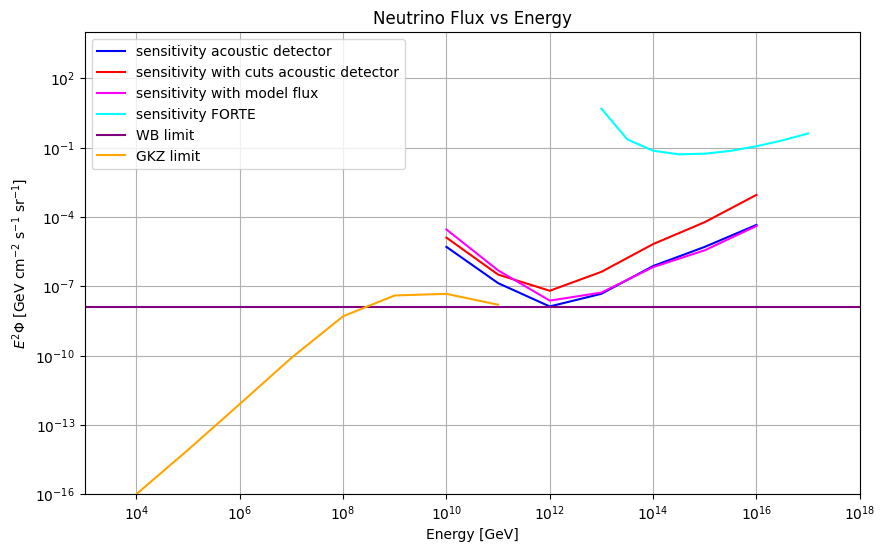

In [14]:
# Plotting
plt.figure(figsize=(10, 6))

# Veff from Lahman paper
plt.loglog(E_GeV, sensitivity, label='sensitivity acoustic detector', color="blue")

# Veff from https://arxiv.org/pdf/0708.1960.pdf
plt.loglog(E_GeV, sensitivity2, label='sensitivity with cuts acoustic detector', color="red")

# flux from source 2
plt.loglog(E_GeV, sensitivity3, label='sensitivity with model flux', color="magenta")

################################################################################################################################
# add the sensitivity of FORTE
lambda_E = [8.0E12, 5.4E14, 5.3E15, 2.4E16, 7.1E16, 1.7E17, 3.4E17, 6.0E17, 9.5E17]
log = [13.0, 13.5, 14.0, 14.5, 15.0, 15.5, 16.0, 16.5, 17.0]
E = [10**(i) for i in log]
s_up = 3.89
flux_E = [s_up / (x * y) for x, y in zip(E, lambda_E)]
flux_E_E2 = [x**2 * y for x, y in zip(E, flux_E)]
plt.plot(E, flux_E_E2, label='sensitivity FORTE', color='cyan')
################################################################################################################################
# add the WB limit
plt.axhline(10**(-7.9), label="WB limit", color="purple")
################################################################################################################################
# add the GKZ neutrinos from source 3.
GKZ_E = [10**(4), 10**(5), 10**(6), 10**(7), 10**(8), 10**(9), 10**(10), 10**(11)]
GKZ_flux_E = [10**(-20), 10**(-19.08), 10**(-18.1), 10**(-17.1), 10**(-16.3), 10**(-16.4), 10**(-17.33), 10**(-18.8)]
GKZ_flux_E2 = [i * j for i,j in zip(GKZ_E, GKZ_flux_E)]
plt.plot(GKZ_E, GKZ_flux_E2, label='GKZ limit', color='orange')
print(GKZ_flux_E2)

################################################################################################################################

plt.title('Neutrino Flux vs Energy')
plt.xlabel('Energy [GeV]')
plt.ylabel('$E^2\Phi$ [GeV cm$^{-2}$ s$^{-1}$ sr$^{-1}$]')
plt.xlim(10**3, 10**(18))
plt.ylim(10**(-16), 10**(4))
plt.legend()
plt.grid(True)
plt.show()

## Checking Parameters

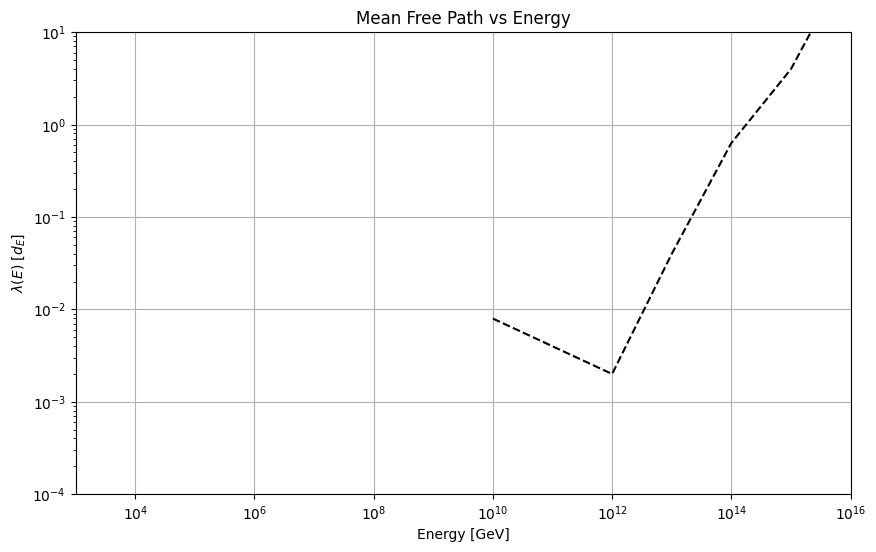

In [11]:
# Plotting
plt.figure(figsize=(10, 6))
plt.loglog(E_GeV, lambda_Ed, color="black", linestyle="--")

plt.title('Mean Free Path vs Energy')
plt.xlabel('Energy [GeV]')
plt.ylabel('$\lambda(E)$ [$d_E$]')
plt.xlim(10**3, 10**(16))
plt.ylim(10**(-4), 10**(1))
plt.grid(True)
plt.show()

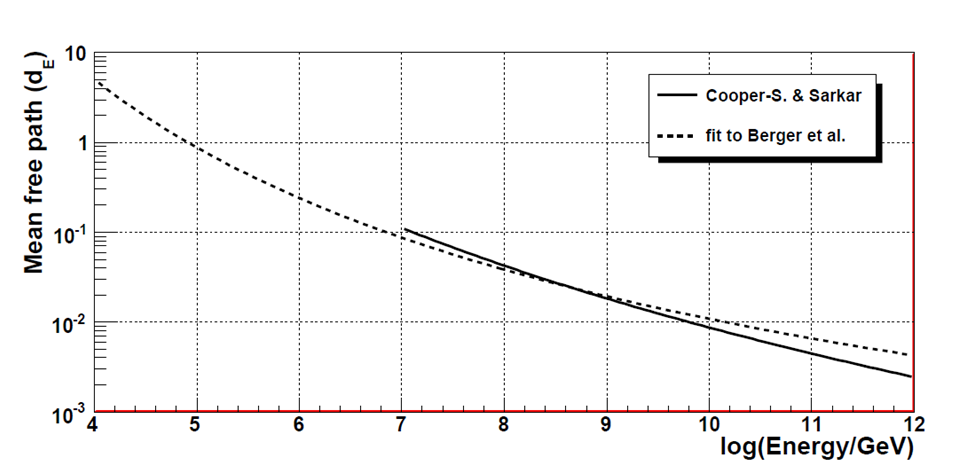

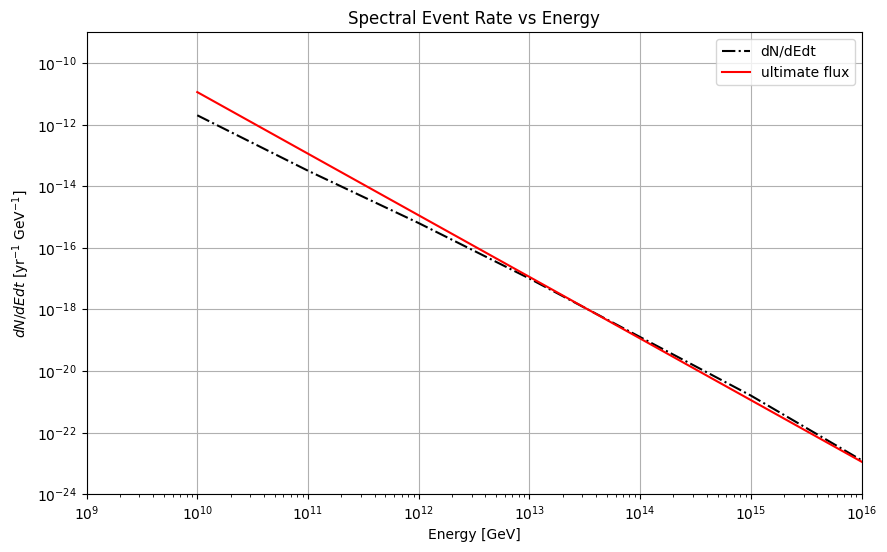

In [12]:
# Plotting
plt.figure(figsize=(10, 6))
plt.loglog(E_GeV, spectral_event_rate, label='dN/dEdt', color="black", linestyle="-.")
plt.loglog(E_GeV, ultimate_flux, label='ultimate flux', color="red", linestyle="-")

plt.title('Spectral Event Rate vs Energy')
plt.xlabel('Energy [GeV]')
plt.ylabel('$dN/dEdt$ [yr$^{-1}$ GeV$^{-1}$]')
plt.xlim(10**(9), 10**(16))
plt.ylim(10**(-24), 10**(-9))
plt.legend()
plt.grid(True)
plt.show()

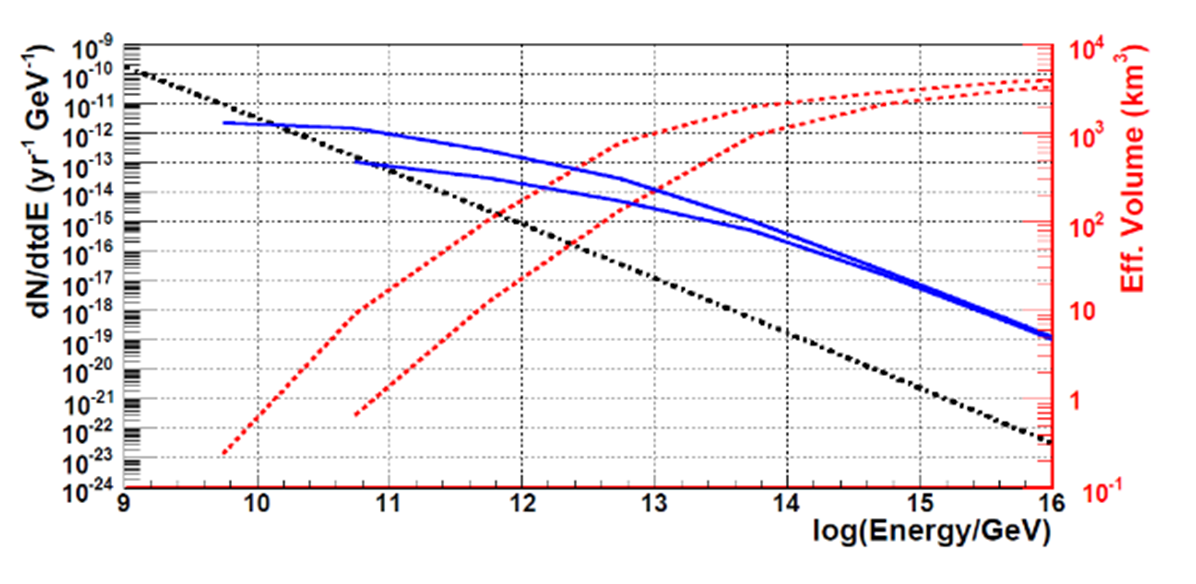

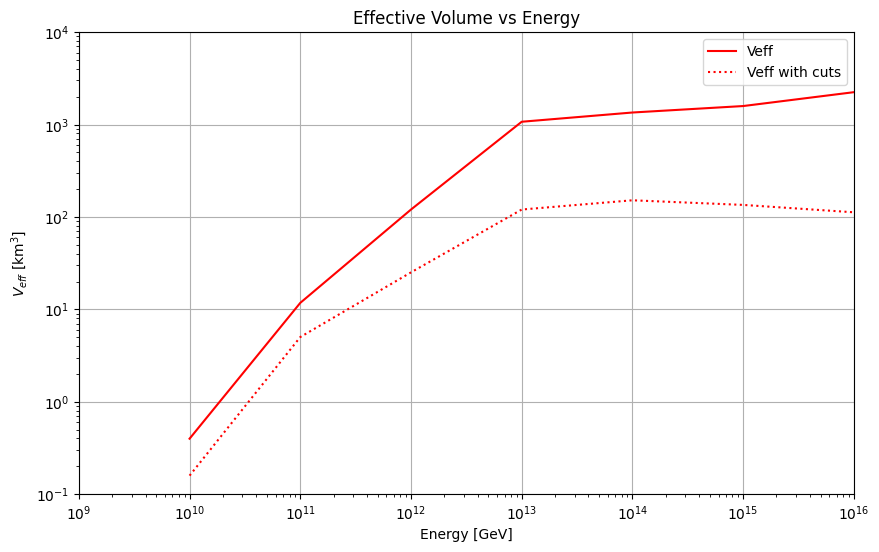

In [13]:
# Plotting
plt.figure(figsize=(10, 6))
plt.loglog(E_GeV, Veff_km, label='Veff', color="red", linestyle="solid")
plt.loglog(E_GeV, Veff_km_cuts, label='Veff with cuts', color="red", linestyle="dotted")

plt.title('Effective Volume vs Energy')
plt.xlabel('Energy [GeV]')
plt.ylabel('$V_{eff}$ [km$^{3}$]')
plt.xlim(10**(9), 10**(16))
plt.ylim(10**(-1), 10**(4))
plt.legend()
plt.grid(True)
plt.show()

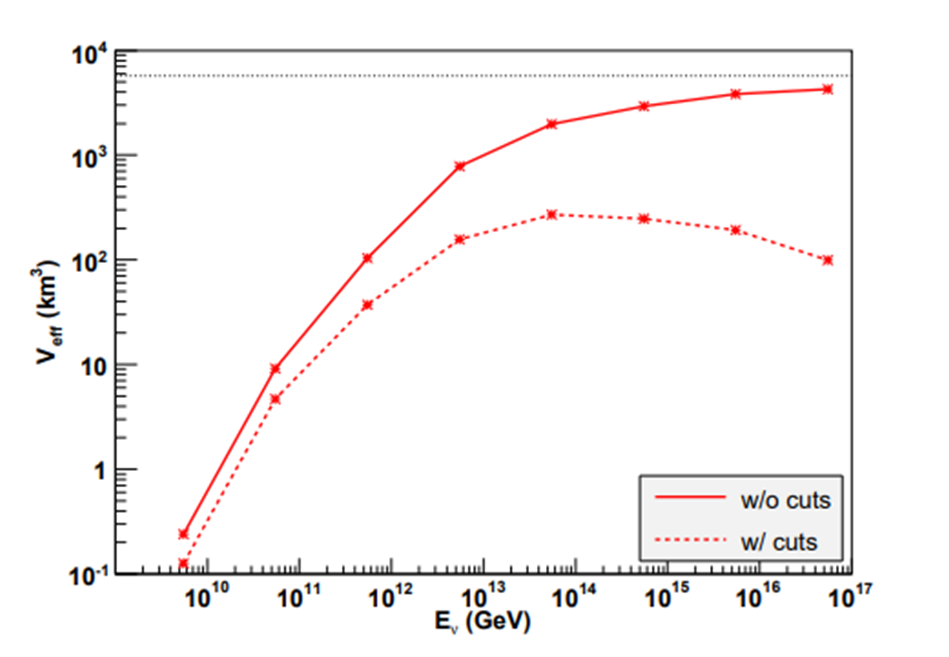

# From Perkin we can find a relation between the max pulse pressure and the energy of the incoming neutrino: 2.12 × 10^−11 Pa per GeV

In [56]:
log_energy = np.linspace(7, 17, 100)
neutrino_energy = [10**i for i in log_energy]

def relation(neutrino_energy):
    pressure = 2.12 * 10**(-11) * neutrino_energy
    pressure_mPa = pressure * 1000
    return pressure_mPa

In [57]:
plot_pressure = []

for i in range(0, len(neutrino_energy)):
    energy = neutrino_energy[i]
    plot_pressure.append(relation(energy))

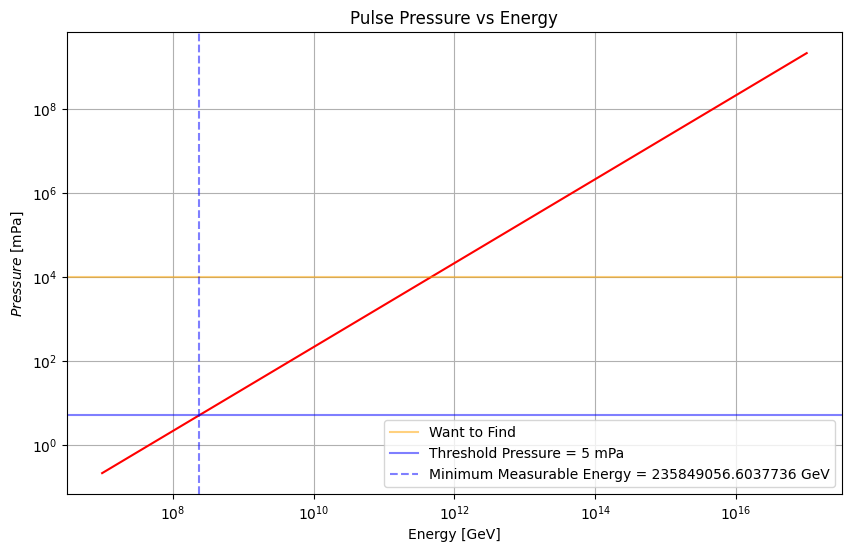

In [79]:
energy_threshold = 5 / (1000 * 2.12 * 10**(-11))


# Plotting
plt.figure(figsize=(10, 6))
plt.loglog(neutrino_energy, plot_pressure, color="red", linestyle="solid")

plt.title('Pulse Pressure vs Energy')
plt.xlabel('Energy [GeV]')
plt.ylabel('$Pressure$ [mPa]')

plt.axhline(10000, color="orange", alpha=0.5, label="Want to Find")

plt.axhline(5, color="blue", alpha=0.5, label="Threshold Pressure = 5 mPa")
plt.axvline(energy_threshold, color="blue", linestyle="dashed", alpha=0.5, label=f"Minimum Measurable Energy = {energy_threshold} GeV")

plt.grid(True)
plt.legend()
plt.show()

In [78]:
shower = 5 / (1000 * 2.12 * 10**(-11))
a = "{:.1e}".format(shower)

neutrino = 5 * 5 / (1000 * 2.12 * 10**(-11))
b = "{:.1e}".format(neutrino)

print(f"minimum detectable for a shower energy is {a} GeV. Minumum detectable for a neutrino energy is {b} Gev.")

kevin = 5 * 20 / (1000 * 2.12 * 10**(-11))
c = "{:.1e}".format(kevin)

print(f"In Kevin's code, the neutrino energy is {c} GeV.")

minimum detectable for a shower energy is 2.4e+08 GeV. Minumum detectable for a neutrino energy is 1.2e+09 Gev.
In Kevin's code, the neutrino energy is 4.7e+09 GeV.
